## Setup

In [81]:
import sys
from pathlib import Path

REFERENCE_GENOME = "hg38"
TILE_SIZE = 1000

REPO_DIR = Path("/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry")
sys.path.append(str(REPO_DIR / "src" / "util"))
sys.path

['/usr/lib64/python311.zip',
 '/usr/lib64/python3.11',
 '/usr/lib64/python3.11/lib-dynload',
 '',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/.venv/lib64/python3.11/site-packages',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/.venv/lib64/python3.11/site-packages/cyvcf2-0.31.1-py3.11-linux-x86_64.egg',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/.venv/lib/python3.11/site-packages',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/.venv/lib/python3.11/site-packages/cyvcf2-0.31.1-py3.11-linux-x86_64.egg',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/src/util',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/src/util',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/src/util',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/src/util',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/src/util',
 '/scratch/ucgd/lustre-labs/quinlan/u6018199/tapestry/src/util']

## Palladium Trio

In [82]:
FATHER_UID = "NA12877" 
MOTHER_UID = "NA12878"
CHILD_UID = "NA12881" # 2211

## TR DNMs in child

In [83]:
import polars as pl

pl.Config.set_tbl_rows(10)

# Tom Sasani provided TR DNMs for the child 2211: 
# https://quinlangroup.slack.com/archives/D9LFRMXV3/p1753988258836809
CHILD_TR_DNMS = pl.read_csv("/scratch/ucgd/lustre-labs/quinlan/u1006375/CEPH-K1463-TandemRepeats/tr_validation/seq/2211.GRCh38.allele_sequences.tsv", separator="\t")

(
    CHILD_TR_DNMS
    .select(['#chrom', 'start', 'end', 'phase_consensus', 'haplotype_in_parent_consensus', 'denovo_allele_sequence', 'precursor_allele_length_in_parent', 'precursor_sequence_in_parent', 'struc'])
    .with_columns([
        (pl.col('denovo_allele_sequence').str.len_chars() - pl.col('precursor_sequence_in_parent').str.len_chars()).alias('allele_size_difference')
    ])
    .rename({
        '#chrom': 'chrom',
        'phase_consensus': 'parent-of-origin', 
        'haplotype_in_parent_consensus': 'haplotype-of-origin'
    })
)

chrom,start,end,parent-of-origin,haplotype-of-origin,denovo_allele_sequence,precursor_allele_length_in_parent,precursor_sequence_in_parent,struc,allele_size_difference
str,i64,i64,str,str,str,f64,str,str,u32
"""chr10""",101793189,101793216,"""mom:64""","""UNK""","""AAAAACAAAAACAAAAACAAAAACAAAAAC…",-1.0,"""UNK""","""(AAAAAC)n""",36
"""chr10""",30432978,30433009,"""dad:279""","""B""","""AGAGAGAGAGAGAGAGAGAGAGAGAGAGAG…",247.0,"""AGAAGAGAGAGAGAGAGAGAGAGGAGAGGA…","""(GA)n""",4
"""chr10""",30433093,30433105,"""unknown:0""","""UNK""","""GAGAGAGAGAGAGAGAGAGAGAGAGAGAGA…",-1.0,"""UNK""","""(AGGGGG)n""",233
"""chr10""",44662653,44663103,"""dad:445""","""B""","""AGGGGGCTGTGTCGTGGAGGGTGAGGATGG…",6050.0,"""AGGGGGCTGTGTCGTGGAGGGTGAGGATGG…","""(GGGGTCCTAGGCGGCTGTGTCATGGAGGG…",150
"""chr10""",66515265,66515370,"""mom:287""","""B""","""TATCTATCTATCTATCTATCTATCTATCTA…",129.0,"""TATCTATCTATCTATCTATCTATCTATCTA…","""(TA)n(TC)n(TA)n""",4294967284
…,…,…,…,…,…,…,…,…,…
"""chr9""",70469020,70469154,"""dad:144""","""B""","""TTTTCTTTTCTTCTCTTCTCTAATGACTTC…",134.0,"""TTTTCTTTTCTTCTCTTCTCTAATGACTTC…","""(TTTC)n(TC)n(TTTC)n""",109
"""chr9""",96272373,96272473,"""dad:289""","""B""","""TCTCTCTCTCTCTCTCTCTCTCTCTCTCTC…",120.0,"""TCTCTCTCTCTCTCTCTCTCTCTCTCTCTC…","""(TC)n(TA)n""",4294967290
"""chrX""",130516288,130516340,"""dad:123""","""UNK""","""AAATAAATAAATAAATAAATAAATAAATAA…",-1.0,"""UNK""","""(AAAT)n(GT)n""",53


## Founder-phased DNA methylation at CpG sites common to Father, Mother, and Child in the Palladium trio

In [84]:
PB_CPG_TOOL_MODE = 'model' # mode of aligned_bam_to_cpg_scores
# output dir of src/phase_meth_to_founder_haps.py
OUTPUT_DIR = Path(f"/scratch/ucgd/lustre-labs/quinlan/data-shared/dna-methylation/CEPH1463.GRCh38.hifi.{PB_CPG_TOOL_MODE}.founder-phased")
OUTPUT_DIR

PosixPath('/scratch/ucgd/lustre-labs/quinlan/data-shared/dna-methylation/CEPH1463.GRCh38.hifi.model.founder-phased')

In [ ]:
from read_data import read_data

def get_methylation_sample(uid): 
    return (
        read_data(OUTPUT_DIR, f"{uid}.dna-methylation.founder-phased")
        .drop(["start_hap_map_block", "end_hap_map_block", "total_read_count_pat", "total_read_count_mat"]) # these are readily visualized in IGV, so let's not pollute the df with them
        # .select(['chrom', 'start', 'end', 'methylation_level_pat', 'methylation_level_mat', 'founder_haplotype_pat', 'founder_haplotype_mat'])
    )

get_methylation_sample(FATHER_UID).filter(pl.col("founder_haplotype_pat").is_not_null())

chrom,start,end,haplotype_concordance_in_hap_map_block,num_het_SNVs_in_hap_map_block,methylation_level_pat,methylation_level_mat,founder_haplotype_pat,founder_haplotype_mat,is_within_50bp_of_mismatch_site
str,i64,i64,f64,i64,f64,f64,str,str,bool
"""chr1""",689237,689238,0.944681,235,0.228,0.927,"""E""","""G""",false
"""chr1""",689434,689435,0.944681,235,0.075,0.577,"""E""","""G""",false
"""chr1""",690032,690033,0.944681,235,0.889,0.905,"""E""","""G""",false
"""chr1""",690091,690092,0.944681,235,0.87,0.76,"""E""","""G""",false
"""chr1""",690430,690431,0.944681,235,0.761,0.045,"""E""","""G""",false
…,…,…,…,…,…,…,…,…,…
"""chr9""",138216387,138216388,1.0,5,0.641,0.656,"""E""","""G""",false
"""chr9""",138216400,138216401,1.0,5,0.89,0.927,"""E""","""G""",false
"""chr9""",138216450,138216451,1.0,5,0.775,0.67,"""E""","""G""",false


In [121]:
def prefix_columns(df, prefix, join_keys):
    # add prefixes to all columns except the join keys
    return df.rename({col: f"{prefix}_{col}" for col in df.columns if col not in join_keys})

def get_methylation_trio_by_cpg_site(father_uid, mother_uid, child_uid):
    join_keys = ['chrom', 'start', 'end']

    father_meth = get_methylation_sample(father_uid)
    mother_meth = get_methylation_sample(mother_uid)
    child_meth = get_methylation_sample(child_uid)
    
    father_prefixed = prefix_columns(father_meth, prefix="father", join_keys=join_keys)
    mother_prefixed = prefix_columns(mother_meth, prefix="mother", join_keys=join_keys)
    child_prefixed = prefix_columns(child_meth, prefix="child", join_keys=join_keys)

    # Join on chrom, start, end
    trio_meth_by_cpg_site = (
        father_prefixed
        .join(mother_prefixed, on=join_keys, how='inner')
        .join(child_prefixed, on=join_keys, how='inner')
    )

    # Filter out rows where any founder haplotype is null
    trio_meth_by_cpg_site = trio_meth_by_cpg_site.filter(
        pl.col("father_founder_haplotype_pat").is_not_null() & 
        pl.col("father_founder_haplotype_mat").is_not_null() & 
        pl.col("mother_founder_haplotype_pat").is_not_null() & 
        pl.col("mother_founder_haplotype_mat").is_not_null() & 
        pl.col("child_founder_haplotype_pat").is_not_null() & 
        pl.col("child_founder_haplotype_mat").is_not_null()
    )

    # Filter out rows where any methylation level is null
    trio_meth_by_cpg_site = trio_meth_by_cpg_site.filter(
        pl.col("father_methylation_level_pat").is_not_null() & 
        pl.col("father_methylation_level_mat").is_not_null() & 
        pl.col("mother_methylation_level_pat").is_not_null() & 
        pl.col("mother_methylation_level_mat").is_not_null() & 
        pl.col("child_methylation_level_pat").is_not_null() & 
        pl.col("child_methylation_level_mat").is_not_null()
    )

    return trio_meth_by_cpg_site

TRIO_METH_BY_CPG_SITE = get_methylation_trio_by_cpg_site(FATHER_UID, MOTHER_UID, CHILD_UID)
TRIO_METH_BY_CPG_SITE

chrom,start,end,father_haplotype_concordance_in_hap_map_block,father_num_het_SNVs_in_hap_map_block,father_methylation_level_pat,father_methylation_level_mat,father_founder_haplotype_pat,father_founder_haplotype_mat,father_is_within_50bp_of_mismatch_site,mother_haplotype_concordance_in_hap_map_block,mother_num_het_SNVs_in_hap_map_block,mother_methylation_level_pat,mother_methylation_level_mat,mother_founder_haplotype_pat,mother_founder_haplotype_mat,mother_is_within_50bp_of_mismatch_site,child_haplotype_concordance_in_hap_map_block,child_num_het_SNVs_in_hap_map_block,child_methylation_level_pat,child_methylation_level_mat,child_founder_haplotype_pat,child_founder_haplotype_mat,child_is_within_50bp_of_mismatch_site
str,i64,i64,f64,i64,f64,f64,str,str,bool,f64,i64,f64,f64,str,str,bool,f64,i64,f64,f64,str,str,bool
"""chr1""",689434,689435,0.944681,235,0.075,0.577,"""E""","""G""",false,0.833333,12,0.764,0.695,"""I""","""K""",false,0.945833,240,0.586,0.097,"""G""","""K""",false
"""chr1""",690032,690033,0.944681,235,0.889,0.905,"""E""","""G""",false,0.833333,12,0.883,0.804,"""I""","""K""",false,0.945833,240,0.858,0.957,"""G""","""K""",false
"""chr1""",690091,690092,0.944681,235,0.87,0.76,"""E""","""G""",false,0.833333,12,0.796,0.866,"""I""","""K""",false,0.945833,240,0.902,0.924,"""G""","""K""",false
"""chr1""",690621,690622,0.944681,235,0.785,0.544,"""E""","""G""",false,0.833333,12,0.515,0.494,"""I""","""K""",false,0.945833,240,0.588,0.857,"""G""","""K""",false
"""chr1""",690673,690674,0.944681,235,0.94,0.583,"""E""","""G""",false,0.833333,12,0.75,0.904,"""I""","""K""",false,0.945833,240,0.634,0.928,"""G""","""K""",false
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chr9""",138216387,138216388,1.0,5,0.641,0.656,"""E""","""G""",false,1.0,73,0.646,0.918,"""I""","""K""",false,1.0,71,0.889,0.659,"""E""","""K""",false
"""chr9""",138216400,138216401,1.0,5,0.89,0.927,"""E""","""G""",false,1.0,73,0.805,0.928,"""I""","""K""",false,1.0,71,0.748,0.848,"""E""","""K""",false
"""chr9""",138216450,138216451,1.0,5,0.775,0.67,"""E""","""G""",false,1.0,73,0.845,0.546,"""I""","""K""",false,1.0,71,0.903,0.399,"""E""","""K""",false


## Intervals in each of which all CpG sites share the same founder labels on each of the 6 haplotypes 

In [87]:
import bioframe as bf # https://bioframe.readthedocs.io/en/latest/index.html

def get_tiles(reference_genome, tile_size):
    chromsizes = bf.fetch_chromsizes(db=reference_genome)
    windows = []
    for chrom, length in chromsizes.items():
        for start in range(0, length, tile_size): # type: ignore
            end = start + tile_size
            if end > length:
                continue
            windows.append({"chrom": chrom, "start": start, "end": end})

    return pl.DataFrame(windows)

get_tiles(REFERENCE_GENOME, tile_size=TILE_SIZE)

chrom,start,end
str,i64,i64
"""chr1""",0,1000
"""chr1""",1000,2000
"""chr1""",2000,3000
"""chr1""",3000,4000
"""chr1""",4000,5000
…,…,…
"""chrM""",11000,12000
"""chrM""",12000,13000
"""chrM""",13000,14000


In [88]:
def get_hap_map_blocks(uid):
    return (
        read_data(OUTPUT_DIR, f"{uid}.hap-map-blocks")
        .select(['chrom', 'start', 'end'])
    )

get_hap_map_blocks(FATHER_UID)

chrom,start,end
str,i64,i64
"""chr1""",668466,1052726
"""chr1""",1074443,1079281
"""chr1""",1108637,1265603
"""chr1""",1288373,1610923
"""chr1""",1613420,2370170
…,…,…
"""chr9""",137873339,137943538
"""chr9""",137976541,137977195
"""chr9""",138002413,138087950


In [89]:
def get_intervals(reference_genome, tile_size, father_uid, mother_uid, child_uid):
    tiles = get_tiles(reference_genome, tile_size).to_pandas()
    father_blocks = get_hap_map_blocks(father_uid).to_pandas()
    mother_blocks = get_hap_map_blocks(mother_uid).to_pandas()
    child_blocks = get_hap_map_blocks(child_uid).to_pandas()

    # Intersect tiles and father blocks using bioframe.overlap
    tiles_father = (
        bf.overlap(
            tiles,
            father_blocks,
            how='inner',
            return_overlap=True
        )
        [["chrom", "overlap_start", "overlap_end"]]
        .rename(columns={"overlap_start": "start", "overlap_end": "end"})
    )

    # Intersect tiles_father and mother blocks using bioframe.overlap
    tiles_father_mother = (
        bf.overlap(
            tiles_father,
            mother_blocks,
            how='inner',
            return_overlap=True
        )
        [["chrom", "overlap_start", "overlap_end"]]
        .rename(columns={"overlap_start": "start", "overlap_end": "end"})
    )

    # Intersect tiles_father_mother and child blocks using bioframe.overlap
    tiles_father_mother_child = (
        bf.overlap(
            tiles_father_mother,
            child_blocks,
            how='inner',
            return_overlap=True
        )
        [["chrom", "overlap_start", "overlap_end"]]
        .rename(columns={"overlap_start": "start", "overlap_end": "end"})
    )

    return pl.from_pandas(tiles_father_mother_child)

INTERVALS = get_intervals(REFERENCE_GENOME, tile_size=TILE_SIZE, father_uid=FATHER_UID, mother_uid=MOTHER_UID, child_uid=CHILD_UID)
INTERVALS

chrom,start,end
str,i64,i64
"""chr18""",13753,14000
"""chr18""",66811,67000
"""chr18""",446556,447000
"""chr18""",1562269,1563000
"""chr18""",2096903,2097000
…,…,…
"""chr3""",198127000,198128000
"""chr3""",198128000,198129000
"""chr3""",198129000,198130000


shape: (9, 2)
┌────────────┬────────────┐
│ statistic  ┆ value      │
│ ---        ┆ ---        │
│ str        ┆ f64        │
╞════════════╪════════════╡
│ count      ┆ 1.947171e6 │
│ null_count ┆ 0.0        │
│ mean       ┆ 991.802062 │
│ std        ┆ 74.073578  │
│ min        ┆ 0.0        │
│ 25%        ┆ 1000.0     │
│ 50%        ┆ 1000.0     │
│ 75%        ┆ 1000.0     │
│ max        ┆ 1000.0     │
└────────────┴────────────┘


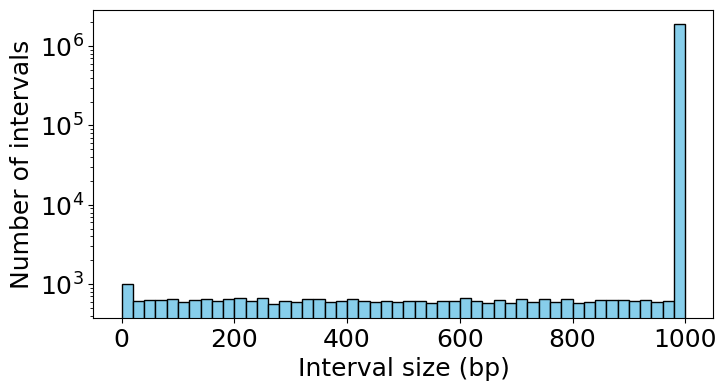

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

def plot_interval_size_distribution(intervals):
    # Compute the size of each interval
    intervals = (intervals.with_columns(
        (pl.col("end") - pl.col("start")).alias("size")
    ))

    # Show basic statistics of interval sizes
    interval_sizes_stats = intervals["size"].describe()
    print(interval_sizes_stats)
    
    plt.figure(figsize=(8, 4))
    plt.hist(intervals["size"].to_numpy(), bins=50, color='skyblue', edgecolor='black')
    plt.xlabel("Interval size (bp)")
    plt.ylabel("Number of intervals")
    plt.yscale('log')
    plt.show()

plot_interval_size_distribution(INTERVALS)

## Founder-phased DNA methylation of trio, averaged over intervals (defined in previous section)

In [122]:
def get_methylation_trio_by_interval(trio_meth_by_cpg_site, intervals):
    # Assign each CpG site to an interval
    trio_meth_by_cpg_site = bf.overlap(
        trio_meth_by_cpg_site.to_pandas(),
        intervals.to_pandas(),
        how='inner',
        return_overlap=False
    )

    # Drop and rename interval columns
    trio_meth_by_cpg_site = (
        pl.from_pandas(trio_meth_by_cpg_site)
        .drop(["chrom_"])
        .rename({
            "start_": "start_interval",
            "end_": "end_interval",
        })
    )

    # Group by interval, founder haplotype, etc, and aggregate methylation levels using Polars API
    trio_meth_by_interval = (
        trio_meth_by_cpg_site
        .group_by([
            "chrom", "start_interval", "end_interval",
            # founder haplotypes are the same for all CpG sites in a given interval, by construction
            "father_founder_haplotype_pat", "father_founder_haplotype_mat",
            "mother_founder_haplotype_pat", "mother_founder_haplotype_mat",
            "child_founder_haplotype_pat", "child_founder_haplotype_mat",
            # concordance is the same for all CpG sites in a given interval, by construction
            "father_haplotype_concordance_in_hap_map_block",
            "mother_haplotype_concordance_in_hap_map_block",
            "child_haplotype_concordance_in_hap_map_block",
            # number of heterozygous SNVs (in the interval) is the same for all CpG sites in the given interval, by construction
            "father_num_het_SNVs_in_hap_map_block",
            "mother_num_het_SNVs_in_hap_map_block",
            "child_num_het_SNVs_in_hap_map_block",
        ])
        .agg([
            pl.col("father_methylation_level_pat").mean(),
            pl.col("father_methylation_level_mat").mean(),
            pl.col("mother_methylation_level_pat").mean(),
            pl.col("mother_methylation_level_mat").mean(),
            pl.col("child_methylation_level_pat").mean(),
            pl.col("child_methylation_level_mat").mean(),
            pl.col("start").count().alias("num_cpgs"),
            # TESTING: compute number of unique founder haplotypes at each CpG site in each interval
            # (pl.col("father_founder_haplotype_pat").n_unique()).alias("father_founder_haplotype_pat_unique"),
            # (pl.col("father_founder_haplotype_mat").n_unique()).alias("father_founder_haplotype_mat_unique"),
            # (pl.col("mother_founder_haplotype_pat").n_unique()).alias("mother_founder_haplotype_pat_unique"),
            # (pl.col("mother_founder_haplotype_mat").n_unique()).alias("mother_founder_haplotype_mat_unique"),
            # (pl.col("child_founder_haplotype_pat").n_unique()).alias("child_founder_haplotype_pat_unique"),
            # (pl.col("child_founder_haplotype_mat").n_unique()).alias("child_founder_haplotype_mat_unique"),
            pl.col("father_is_within_50bp_of_mismatch_site").sum().alias("father_num_cpgs_within_50p_of_a_mismatch_site"),
            pl.col("mother_is_within_50bp_of_mismatch_site").sum().alias("mother_num_cpgs_within_50p_of_a_mismatch_site"),
            pl.col("child_is_within_50bp_of_mismatch_site").sum().alias("child_num_cpgs_within_50p_of_a_mismatch_site"),
        ])
    )

    # TESTING: Check that values of founder haplotypes at all CpG sites in each interval are the same
    # unique_cols = [col for col in trio_meth_by_interval.columns if col.endswith('_unique')]
    # for col in unique_cols:
    #     all_ones = (trio_meth_by_interval[col] == 1).all()
    #     print(f"Is '{col}' all 1s?:", all_ones)

    return trio_meth_by_interval.rename({"start_interval": "start", "end_interval": "end"})

TRIO_METH_BY_INTERVAL = get_methylation_trio_by_interval(TRIO_METH_BY_CPG_SITE, INTERVALS)
TRIO_METH_BY_INTERVAL

chrom,start,end,father_founder_haplotype_pat,father_founder_haplotype_mat,mother_founder_haplotype_pat,mother_founder_haplotype_mat,child_founder_haplotype_pat,child_founder_haplotype_mat,father_haplotype_concordance_in_hap_map_block,mother_haplotype_concordance_in_hap_map_block,child_haplotype_concordance_in_hap_map_block,father_num_het_SNVs_in_hap_map_block,mother_num_het_SNVs_in_hap_map_block,child_num_het_SNVs_in_hap_map_block,father_methylation_level_pat,father_methylation_level_mat,mother_methylation_level_pat,mother_methylation_level_mat,child_methylation_level_pat,child_methylation_level_mat,num_cpgs,father_num_cpgs_within_50p_of_a_mismatch_site,mother_num_cpgs_within_50p_of_a_mismatch_site,child_num_cpgs_within_50p_of_a_mismatch_site
str,i64,i64,str,str,str,str,str,str,f64,f64,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64,u32,u32,u32,u32
"""chr7""",83673000,83674000,"""E""","""G""","""I""","""K""","""G""","""I""",1.0,1.0,1.0,2168,1096,1027,0.929089,0.937489,0.950378,0.954,0.929222,0.955378,45,0,0,0
"""chr5""",90920000,90921000,"""E""","""G""","""I""","""K""","""E""","""I""",1.0,0.54902,1.0,1,51,239,0.782167,0.778667,0.787167,0.7875,0.752833,0.796333,6,0,0,0
"""chr13""",81133000,81134000,"""E""","""G""","""I""","""K""","""E""","""K""",1.0,1.0,1.0,17,63,19,0.856333,0.836333,0.792333,0.784,0.831,0.805,3,0,0,0
"""chr1""",147288000,147289000,"""E""","""G""","""I""","""K""","""G""","""I""",1.0,1.0,0.905612,1261,1331,1568,0.950333,0.9475,0.955,0.949,0.872833,0.9045,6,0,0,0
"""chr8""",9195000,9196000,"""E""","""G""","""I""","""K""","""G""","""I""",1.0,1.0,1.0,4968,1379,1708,0.875,0.839,0.808385,0.861154,0.823615,0.819462,13,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chr2""",156290000,156291000,"""E""","""G""","""I""","""K""","""G""","""K""",1.0,0.938393,0.998353,1728,1120,1822,0.953667,0.952667,0.952,0.867,0.772,0.956667,3,0,0,0
"""chr2""",1942000,1943000,"""E""","""G""","""I""","""K""","""G""","""I""",1.0,1.0,1.0,597,195,1493,0.913692,0.939692,0.903615,0.911308,0.855231,0.951154,13,0,0,0
"""chr10""",42268000,42269000,"""E""","""G""","""I""","""K""","""E""","""I""",0.747212,0.730998,1.0,538,1513,6,0.62,0.704,0.669,0.724,0.736,0.204,1,0,0,0


## Difference in methylation between a child haplotype and the corresponding parental haplotype

In [124]:
# For each child haplotype, create a polars expression that selects the corresponding parent methylation value
def get_parent_meth_expr(child_hap):
    return (
        pl
        .when(pl.col(child_hap) == pl.col("father_founder_haplotype_pat")).then(pl.col("father_methylation_level_pat"))
        .when(pl.col(child_hap) == pl.col("father_founder_haplotype_mat")).then(pl.col("father_methylation_level_mat"))
        .when(pl.col(child_hap) == pl.col("mother_founder_haplotype_pat")).then(pl.col("mother_methylation_level_pat"))
        .when(pl.col(child_hap) == pl.col("mother_founder_haplotype_mat")).then(pl.col("mother_methylation_level_mat"))
        .otherwise(None)
    )

def compute_parent_child_methylation_diffs(trio_meth):
    return (
        trio_meth
        .with_columns([
            get_parent_meth_expr("child_founder_haplotype_pat").alias("parent_methylation_level_for_child_pat"),
            get_parent_meth_expr("child_founder_haplotype_mat").alias("parent_methylation_level_for_child_mat"),
        ])
        .with_columns([
            (pl.col("child_methylation_level_pat") - pl.col("parent_methylation_level_for_child_pat")).alias("diff_methylation_pat"),
            (pl.col("child_methylation_level_mat") - pl.col("parent_methylation_level_for_child_mat")).alias("diff_methylation_mat"),
        ])
    )

TRIO_METH_BY_CPG_SITE_WITH_DIFFS = compute_parent_child_methylation_diffs(TRIO_METH_BY_CPG_SITE)
TRIO_METH_BY_INTERVAL_WITH_DIFFS = compute_parent_child_methylation_diffs(TRIO_METH_BY_INTERVAL) 

TRIO_METH_BY_INTERVAL_WITH_DIFFS

chrom,start,end,father_founder_haplotype_pat,father_founder_haplotype_mat,mother_founder_haplotype_pat,mother_founder_haplotype_mat,child_founder_haplotype_pat,child_founder_haplotype_mat,father_haplotype_concordance_in_hap_map_block,mother_haplotype_concordance_in_hap_map_block,child_haplotype_concordance_in_hap_map_block,father_num_het_SNVs_in_hap_map_block,mother_num_het_SNVs_in_hap_map_block,child_num_het_SNVs_in_hap_map_block,father_methylation_level_pat,father_methylation_level_mat,mother_methylation_level_pat,mother_methylation_level_mat,child_methylation_level_pat,child_methylation_level_mat,num_cpgs,father_num_cpgs_within_50p_of_a_mismatch_site,mother_num_cpgs_within_50p_of_a_mismatch_site,child_num_cpgs_within_50p_of_a_mismatch_site,parent_methylation_level_for_child_pat,parent_methylation_level_for_child_mat,diff_methylation_pat,diff_methylation_mat
str,i64,i64,str,str,str,str,str,str,f64,f64,f64,i64,i64,i64,f64,f64,f64,f64,f64,f64,u32,u32,u32,u32,f64,f64,f64,f64
"""chr7""",83673000,83674000,"""E""","""G""","""I""","""K""","""G""","""I""",1.0,1.0,1.0,2168,1096,1027,0.929089,0.937489,0.950378,0.954,0.929222,0.955378,45,0,0,0,0.937489,0.950378,-0.008267,0.005
"""chr5""",90920000,90921000,"""E""","""G""","""I""","""K""","""E""","""I""",1.0,0.54902,1.0,1,51,239,0.782167,0.778667,0.787167,0.7875,0.752833,0.796333,6,0,0,0,0.782167,0.787167,-0.029333,0.009167
"""chr13""",81133000,81134000,"""E""","""G""","""I""","""K""","""E""","""K""",1.0,1.0,1.0,17,63,19,0.856333,0.836333,0.792333,0.784,0.831,0.805,3,0,0,0,0.856333,0.784,-0.025333,0.021
"""chr1""",147288000,147289000,"""E""","""G""","""I""","""K""","""G""","""I""",1.0,1.0,0.905612,1261,1331,1568,0.950333,0.9475,0.955,0.949,0.872833,0.9045,6,0,0,0,0.9475,0.955,-0.074667,-0.0505
"""chr8""",9195000,9196000,"""E""","""G""","""I""","""K""","""G""","""I""",1.0,1.0,1.0,4968,1379,1708,0.875,0.839,0.808385,0.861154,0.823615,0.819462,13,0,0,0,0.839,0.808385,-0.015385,0.011077
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""chr2""",156290000,156291000,"""E""","""G""","""I""","""K""","""G""","""K""",1.0,0.938393,0.998353,1728,1120,1822,0.953667,0.952667,0.952,0.867,0.772,0.956667,3,0,0,0,0.952667,0.867,-0.180667,0.089667
"""chr2""",1942000,1943000,"""E""","""G""","""I""","""K""","""G""","""I""",1.0,1.0,1.0,597,195,1493,0.913692,0.939692,0.903615,0.911308,0.855231,0.951154,13,0,0,0,0.939692,0.903615,-0.084462,0.047538
"""chr10""",42268000,42269000,"""E""","""G""","""I""","""K""","""E""","""I""",0.747212,0.730998,1.0,538,1513,6,0.62,0.704,0.669,0.724,0.736,0.204,1,0,0,0,0.62,0.669,0.116,-0.465


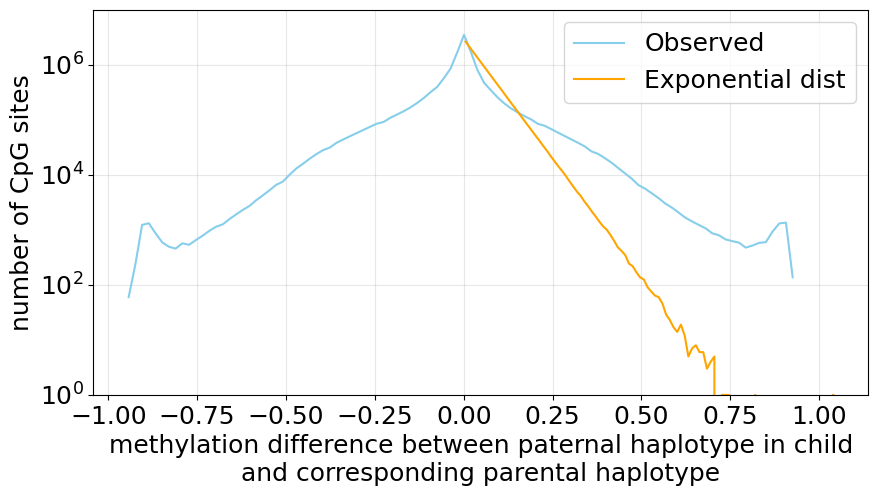

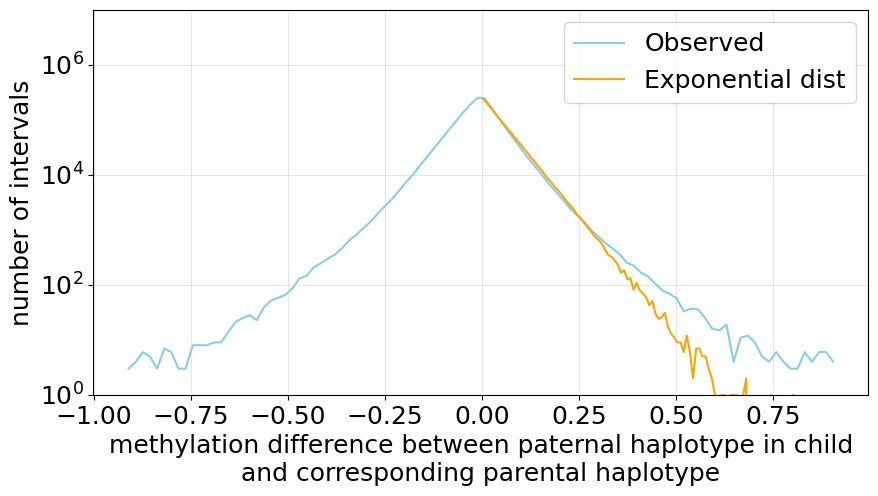

In [185]:
# TODO: reproduce these plots, after filtering on intervals where we have little confidence in pat/mat->hap1/hap2 assignment (filtering on hap_concordance_in_hap_map_block and num_het_SNVs_in_hap_map_block), 
# and, possibly, on intervals where there are null cpg sites (i.e., null methylation_level_pat or null methylation_level_mat)

import numpy as np

def plot_diff_methylation(trio_meth_with_diffs, child_hap, ylabel):
    assert child_hap in ['pat', 'mat']
    
    diff_meth_col = f'diff_methylation_{child_hap}'
    diffs = trio_meth_with_diffs[diff_meth_col].to_numpy()

    # Compute expected diffs as a set of numbers drawn from an exponential distribution
    # We'll use the same number of samples as in diffs, and lambda=1 for the exponential distribution
    expected_diffs = np.random.exponential(scale=0.05, size=diffs.shape[0])

    
    xlabel = (
        'methylation difference between paternal haplotype in child\nand corresponding parental haplotype' 
        if child_hap == 'pat' 
        else 'methylation difference between maternal haplotype in child\nand corresponding parental haplotype'
    )

    plt.figure(figsize=(10, 5))

    # Plot observed diffs
    counts, bin_edges = np.histogram(diffs, bins=100)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, counts, color='skyblue', label='Observed')
    plt.yscale('log')

    # Overlay expected diffs
    # Plot expected diffs as a line
    counts, bin_edges = np.histogram(expected_diffs, bins=100)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, counts, color='orange', label='Exponential dist')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, alpha=0.3)
    plt.ylim(1e0, 1e7)
    plt.legend()
    plt.show()

plot_diff_methylation(TRIO_METH_BY_CPG_SITE_WITH_DIFFS, child_hap="pat", ylabel="number of CpG sites")
# plot_diff_methylation(TRIO_METH_BY_CPG_SITE_WITH_DIFFS, child_hap="mat", ylabel="number of CpG sites")

plot_diff_methylation(TRIO_METH_BY_INTERVAL_WITH_DIFFS, child_hap="pat", ylabel="number of intervals")
# plot_diff_methylation(TRIO_METH_BY_INTERVAL_WITH_DIFFS, child_hap="mat", ylabel="number of intervals")

## Inspecting CpG sites for which the haplotype-specific child-parent methylation difference is largest

In [199]:
def filter_trio_meth(trio_meth, hap_concordance_threshold, num_het_snv_threshold):
    for role in ["father", "mother", "child"]:
        trio_meth = trio_meth.filter(pl.col(f"{role}_haplotype_concordance_in_hap_map_block") > hap_concordance_threshold)
        trio_meth = trio_meth.filter(pl.col(f"{role}_num_het_SNVs_in_hap_map_block") > num_het_snv_threshold)
    return trio_meth

# Find records with most extreme (largest absolute) diff_methylation_pat values
def find_extreme_diffs(trio_meth_with_diffs, child_hap, hap_concordance_threshold, num_het_snv_threshold, mismatch_label="num_cpgs_within_50p_of_a_mismatch_site"):
    trio_meth_with_diffs = filter_trio_meth(trio_meth_with_diffs, hap_concordance_threshold, num_het_snv_threshold)

    diff_meth_col = f'diff_methylation_{child_hap}'

    trio_meth_with_diffs = (
        trio_meth_with_diffs
        .with_columns(
            pl.col(diff_meth_col).abs().alias(f"abs_{diff_meth_col}")
        )
        .sort(f"abs_{diff_meth_col}", descending=True)
        .head(10)
        .with_columns([
            (
                pl.col("chrom") + 
                ":" +
                pl.col("start").cast(pl.Utf8) + 
                "-" +
                pl.col("end").cast(pl.Utf8)
            ).alias("region")
        ])
        .select(
            "father_haplotype_concordance_in_hap_map_block",
            "mother_haplotype_concordance_in_hap_map_block",
            "child_haplotype_concordance_in_hap_map_block",
            "father_num_het_SNVs_in_hap_map_block",
            "mother_num_het_SNVs_in_hap_map_block",
            "child_num_het_SNVs_in_hap_map_block",
            f"father_{mismatch_label}",
            f"mother_{mismatch_label}",
            f"child_{mismatch_label}",
            "diff_methylation_pat",
            "diff_methylation_mat",
            "region",
        )
        .rename({
            "father_haplotype_concordance_in_hap_map_block": "father_hap_concord",
            "mother_haplotype_concordance_in_hap_map_block": "mother_hap_concord",
            "child_haplotype_concordance_in_hap_map_block": "child_hap_concord",
            "father_num_het_SNVs_in_hap_map_block": "father_num_hets",
            "mother_num_het_SNVs_in_hap_map_block": "mother_num_hets",
            "child_num_het_SNVs_in_hap_map_block": "child_num_hets",
            "diff_methylation_pat": "diff_meth_pat",
            "diff_methylation_mat": "diff_meth_mat",
            "region": "region",
        })
    )

    if mismatch_label == "num_cpgs_within_50p_of_a_mismatch_site":
        trio_meth_with_diffs = trio_meth_with_diffs.rename({
            f"father_{mismatch_label}": "father_num_sus_cpgs",
            f"mother_{mismatch_label}": "mother_num_sus_cpgs",
            f"child_{mismatch_label}": "child_num_sus_cpgs",
        })

    if mismatch_label == "is_within_50bp_of_mismatch_site":
        trio_meth_with_diffs = trio_meth_with_diffs.rename({
            f"father_{mismatch_label}": "father_is_sus_cpg",
            f"mother_{mismatch_label}": "mother_is_sus_cpg",
            f"child_{mismatch_label}": "child_is_sus_cpg",
        })

    return trio_meth_with_diffs

In [200]:
# TODO: make a remark/conclusion about this df: methylation is specific to pat/mat, not genotype
find_extreme_diffs(TRIO_METH_BY_CPG_SITE_WITH_DIFFS, "pat", hap_concordance_threshold=0.0, num_het_snv_threshold=0, mismatch_label="is_within_50bp_of_mismatch_site")

father_hap_concord,mother_hap_concord,child_hap_concord,father_num_hets,mother_num_hets,child_num_hets,father_is_sus_cpg,mother_is_sus_cpg,child_is_sus_cpg,diff_meth_pat,diff_meth_mat,region
f64,f64,f64,i64,i64,i64,bool,bool,bool,f64,f64,str
1.0,1.0,1.0,243,212,71,false,false,false,-0.952,-0.041,"""chr19:56838789-56838790"""
1.0,1.0,1.0,243,212,71,false,false,false,-0.949,0.007,"""chr19:56839016-56839017"""
1.0,1.0,1.0,243,212,71,false,false,false,-0.949,-0.002,"""chr19:56839778-56839779"""
1.0,1.0,1.0,243,212,71,false,false,false,-0.945,-0.116,"""chr19:56838356-56838357"""
1.0,1.0,1.0,243,212,71,false,false,false,-0.945,0.0,"""chr19:56839418-56839419"""
1.0,1.0,1.0,260,667,192,false,false,false,-0.945,-0.002,"""chr20:58889732-58889733"""
1.0,1.0,1.0,243,212,71,false,false,false,-0.944,-0.131,"""chr19:56838791-56838792"""
1.0,1.0,1.0,243,212,71,false,false,false,-0.944,-0.028,"""chr19:56839410-56839411"""
1.0,1.0,1.0,260,667,192,false,false,false,-0.944,-0.009,"""chr20:58888707-58888708"""


## Inspecting intervals where the haplotype-specific child-parental methylation difference is largest

In [201]:
find_extreme_diffs(TRIO_METH_BY_INTERVAL_WITH_DIFFS, "pat", hap_concordance_threshold=0.0, num_het_snv_threshold=0, mismatch_label="num_cpgs_within_50p_of_a_mismatch_site")

father_hap_concord,mother_hap_concord,child_hap_concord,father_num_hets,mother_num_hets,child_num_hets,father_num_sus_cpgs,mother_num_sus_cpgs,child_num_sus_cpgs,diff_meth_pat,diff_meth_mat,region
f64,f64,f64,i64,i64,i64,u32,u32,u32,f64,f64,str
0.800659,1.0,1.0,607,66,424,1,0,0,-0.919,-0.136,"""chr3:72683000-72684000"""
1.0,1.0,0.922078,5,1,77,0,0,0,-0.917,-0.044,"""chr2:97153000-97154000"""
0.728464,0.815217,1.0,1068,920,934,1,0,0,0.915,0.005,"""chr12:11013000-11014000"""
0.826389,0.554167,0.607463,432,240,670,0,0,1,0.903,-0.909,"""chr2:95801000-95802000"""
1.0,1.0,0.942708,802,1097,192,0,0,1,-0.903,0.874,"""chr11:80013000-80013304"""
0.559165,1.0,1.0,431,190,1276,1,0,0,0.899,0.148,"""chr7:88393000-88394000"""
0.573171,0.976744,0.8,82,43,5,0,0,0,0.899,-0.865,"""chr9:41071000-41072000"""
1.0,1.0,0.573482,571,1127,2157,0,0,1,-0.896,0.91,"""chr13:60255000-60256000"""
0.574901,1.0,0.692729,1769,121,2008,1,0,0,-0.895,0.029,"""chr10:69609000-69610000"""


In [190]:
# # Find CpG sites in the interval that has the most extreme diff_methylation_pat value
# pl.DataFrame(bf.select(
#     df=TRIO_METH_BY_CPG_SITE_WITH_DIFFS.to_pandas(), 
#     region=EXTREME_DIFFS_BY_INTERVAL_PAT["region"][0],
# ))